## Spatial Join

In [178]:
import rasterio
import fiona
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio.mask
from shapely import affinity
from shapely.geometry import Point, MultiPoint, Polygon, box, GeometryCollection
from shapely.ops import nearest_points
from rasterio.plot import show

In [68]:
# Spatial Join

url_est = 'https://raw.githubusercontent.com/Digdgeo/AEPython/main/D%C3%ADa%205/estaciones.geojson'
est = gpd.read_file(url_est)
print(est.crs)
est.head()

EPSG:25829


,ID_GRAFIC,CODIGO,NOMBRE,X,Y,COTA,lat,lon,geometry
0,0,D01,FLUMEN-Travieso,NaN,NaN,0.868,36.958565,-6.332115,POINT (737545.233 4093605.674)
1,1,D02,FLUMEN-Ansares,NaN,NaN,0.888,36.936345,-6.326085,POINT (738151.473 4091155.039)
2,2,D03,FLUMEN-Tejada,NaN,NaN,1.590,37.063230,-6.297232,POINT (740321.149 4105307.722)
3,3,D04,FLUMEN-Lobo,NaN,NaN,0.909,37.070770,-6.342934,POINT (736233.592 4106029.613)
4,4,D05,FLUMEN-VetaLengua,NaN,NaN,0.912,36.921450,-6.383337,POINT (733097.163 4089360.590)


In [136]:
# Ejemplo de lectura de un mapa desde la web
url_fin = "/media/diego/Datos3/EBD/Cursos/AETPython/Dia3/fincas_ECOPY.shp"
fin = gpd.read_file(url_fin)
print(fin.crs)
fin.head()

EPSG:25829


,OBJECTID,FINCA,TITULARIDA,Hectareas,Shape_Leng,Shape_Area,geometry
0,1,ROCINA,Pública,1236.081506,27352.769977,1.237685e+07,"POLYGON ((711956.851 4116309.675, 711959.785 4..."
1,2,MANECORRO,Pública,14.817218,1510.912287,1.483424e+05,"POLYGON ((722974.231 4111420.866, 722964.460 4..."
2,3,MADRE,Pública,206.099286,6840.495031,2.063299e+06,"POLYGON ((724385.301 4111693.064, 724395.333 4..."
3,4,SOTOS DE DOÑANA,Pública,898.463463,13851.372449,8.994692e+06,"POLYGON ((726144.117 4107988.363, 725909.165 4..."
4,5,MATASGORDA Y CAÑADA MAYOR,Pública,1833.774088,17752.935873,1.835615e+07,"POLYGON ((730937.401 4112839.843, 730957.771 4..."


In [45]:
fin.crs == est.crs

True

In [41]:
#fin_etrs = fin.to_crs('EPSG:25829')

In [46]:
fin_est = fin.sjoin(
    est,
    how="left",
    predicate="intersects"
)
fin_est

,OBJECTID,FINCA,TITULARIDA,Hectareas,Shape_Leng,Shape_Area,geometry,index_right,ID_GRAFIC,CODIGO,NOMBRE,X,Y,COTA,lat,lon
0,1,ROCINA,Pública,1236.081506,27352.769977,1.237685e+07,"POLYGON ((711956.851 4116309.675, 711959.785 4...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,MANECORRO,Pública,14.817218,1510.912287,1.483424e+05,"POLYGON ((722974.231 4111420.866, 722964.460 4...",38.0,38.0,E42,automatica,NaN,NaN,0.000,37.123420,-6.492925
2,3,MADRE,Pública,206.099286,6840.495031,2.063299e+06,"POLYGON ((724385.301 4111693.064, 724395.333 4...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,SOTOS DE DOÑANA,Pública,898.463463,13851.372449,8.994692e+06,"POLYGON ((726144.117 4107988.363, 725909.165 4...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,MATASGORDA Y CAÑADA MAYOR,Pública,1833.774088,17752.935873,1.835615e+07,"POLYGON ((730937.401 4112839.843, 730957.771 4...",9.0,9.0,E03,escala,727603.7316,4109664.4839,1.453,37.103797,-6.440139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,53,ENTREMUROS,Pública,1998.423172,51669.775015,1.999548e+07,"POLYGON ((748071.228 4118589.473, 748086.378 4...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,54,HUERTA TEJADA,Pública,57.448239,3152.434654,5.748522e+05,"POLYGON ((742617.832 4106620.946, 742547.953 4...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,55,COTO II HATO RATON,Privada,200.356512,8054.632269,2.005087e+06,"POLYGON ((737151.852 4116622.931, 737141.702 4...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,56,MARISMA PINAR ALGAIDA,Privada,2760.857409,27955.520432,2.762966e+07,"POLYGON ((741857.381 4085200.940, 741973.788 4...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Clip Geometries

In [49]:
fin_est.crs

<Derived Projected CRS: EPSG:25829>
Name: ETRS89 / UTM zone 29N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe between 12°W and 6°W: Faroe Islands - onshore and offshore; Ireland - offshore; Jan Mayen - onshore and offshore; Portugal - onshore and offshore; Spain - onshore and offshore; United Kingdom - UKCS offshore.
- bounds: (-12.0, 34.91, -6.0, 74.13)
Coordinate Operation:
- name: UTM zone 29N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [51]:
marco = '/media/diego/Datos3/EBD/Cursos/AETPython/Dia5/marco.shp'
mar = gpd.read_file(marco)

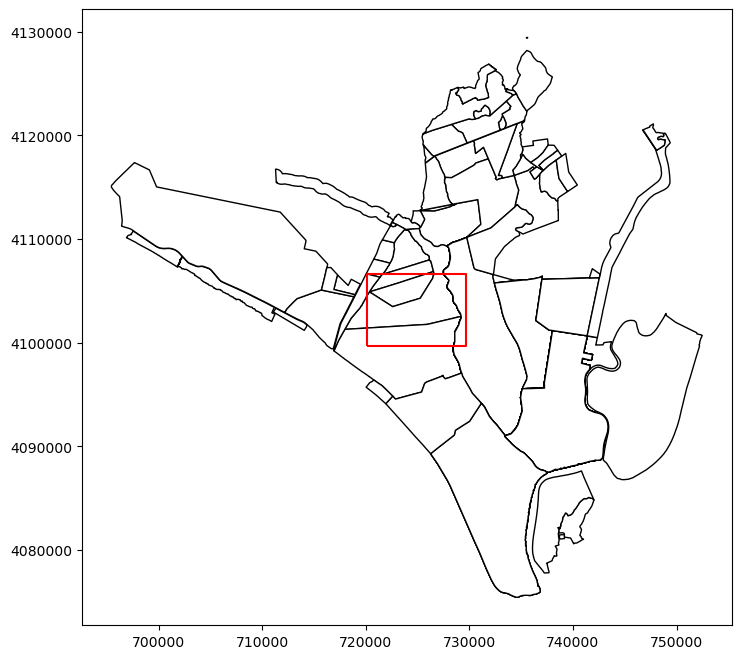

In [62]:
base = fin_est.plot(color='white', edgecolor='black', figsize=(10,8))
mar.boundary.plot(ax=base, color='red')
plt.show()

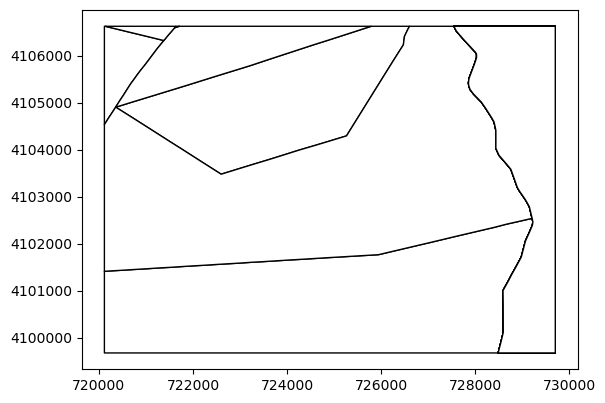

In [65]:
fin_est_clip = fin_est.clip(mar)
fin_est_clip.plot(color='white', edgecolor='black')

## Sampling Points

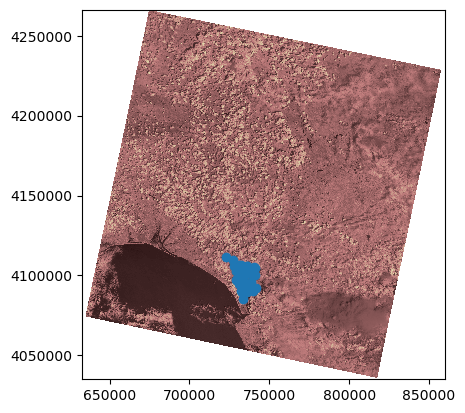

In [71]:
ndvi = '/media/diego/Datos3/EBD/Cursos/AETPython/Dia3/LC08_L2SP_202034_20230602_20230607_02_T1/LC08_L2SP_202034_20230602_20230607_02_T1_SR_B6.TIF'
src = rasterio.open(ndvi)

fig, ax = plt.subplots()

# transform rasterio plot to real world coords
extent = [src.bounds[0], src.bounds[2], src.bounds[1], src.bounds[3]]
ax = rasterio.plot.show(src, extent=extent, ax=ax, cmap="pink")

est.plot(ax=ax)

In [74]:
coord_list = [(x, y) for x, y in zip(est["geometry"].x, est["geometry"].y)]

In [75]:
coord_list

[(737545.2332168163, 4093605.6738017565),
 (738151.4726949956, 4091155.0390303605),
 (740321.1492642346, 4105307.7224098323),
 (736233.5923480837, 4106029.6130730766),
 (733097.1625895865, 4089360.5896078735),
 (738370.0984636615, 4100632.4347097767),
 (741369.1303427244, 4104882.9049653923),
 (738206.5165597779, 4102430.7115404974),
 (733353.5404086384, 4099052.134230404),
 (727491.4450306735, 4109457.0524326866),
 (728178.2077504848, 4106092.0534137334),
 (730953.2203483924, 4106255.644571152),
 (732352.8951415283, 4106594.172486628),
 (729144.8261693364, 4102641.155478685),
 (729274.7327506314, 4097094.100331026),
 (731211.5525774979, 4094327.826789049),
 (733484.9561347868, 4091126.419814705),
 (732761.6101497496, 4104345.127136097),
 (734424.5756247358, 4100235.0808026846),
 (735035.0093379578, 4095670.349216844),
 (729836.0454341931, 4097886.016035929),
 (733381.6228653875, 4095360.536854148),
 (733743.2985531973, 4092159.1310978727),
 (736230.0654961166, 4106044.5711920825),
 (7

In [80]:
est["ndvi"] = [float(x) for x in src.sample(coord_list)]
est.head(15)

,ID_GRAFIC,CODIGO,NOMBRE,X,Y,COTA,lat,lon,geometry,ndvi
0,0,D01,FLUMEN-Travieso,NaN,NaN,0.868,36.958565,-6.332115,POINT (737545.233 4093605.674),22925.0
1,1,D02,FLUMEN-Ansares,NaN,NaN,0.888,36.936345,-6.326085,POINT (738151.473 4091155.039),21461.0
2,2,D03,FLUMEN-Tejada,NaN,NaN,1.590,37.063230,-6.297232,POINT (740321.149 4105307.722),14876.0
3,3,D04,FLUMEN-Lobo,NaN,NaN,0.909,37.070770,-6.342934,POINT (736233.592 4106029.613),22704.0
4,4,D05,FLUMEN-VetaLengua,NaN,NaN,0.912,36.921450,-6.383337,POINT (733097.163 4089360.590),21777.0
5,5,2,SOBEK,738482.5396,4100839.7440,0.000,37.021630,-6.320637,POINT (738370.098 4100632.435),13362.0
6,6,3,SOBEK,741481.6090,4105090.2785,0.000,37.059136,-6.285594,POINT (741369.130 4104882.905),28839.0
7,7,72,SOBEK,738318.9540,4102638.0471,0.000,37.037864,-6.321904,POINT (738206.517 4102430.712),19657.0
8,8,76,SOBEK,733465.9145,4099259.4170,0.000,37.008659,-6.377464,POINT (733353.540 4099052.134),15269.0
9,9,E03,escala,727603.7316,4109664.4839,1.453,37.103797,-6.440139,POINT (727491.445 4109457.052),17707.0


In [184]:
out_ndvi = '/media/diego/Datos3/EBD/Cursos/AETPython/ndvi_crop.tif'

with fiona.open(url_fin, "r") as shapefile:
    shapes = [feature["geometry"] for feature in shapefile]
    
with rasterio.open(ndvi) as src:
    out_image, out_transform = rasterio.mask.mask(src, shapes, crop=True)
    out_meta = src.meta
    
out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})

with rasterio.open(out_ndvi, "w", **out_meta) as dest:
    dest.write(out_image)

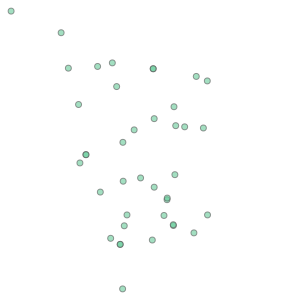

In [196]:
mp = MultiPoint(coord_list)
mp

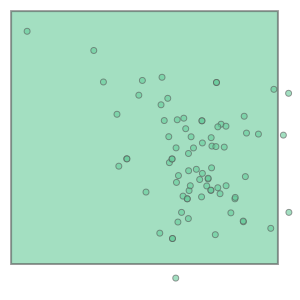

In [180]:
mpm = affinity.scale(mp, xfact=3, yfact=2, origin='centroid')

amppm = GeometryCollection([extent, mp, mpm])
amppm

In [127]:
centroid = mp.centroid
print(centroid)

POINT (734678.2206773784 4097851.6610179795)


In [101]:
cg = Point(np.mean([i[0] for i in coord_list]), np.mean([i[1] for i in coord_list]))
print(cg)

POINT (734678.2206773784 4097851.6610179795)


In [137]:
fin.total_bounds

array([ 695451.29725758, 4075429.77808119,  752467.53160571,
       4129476.80219893])

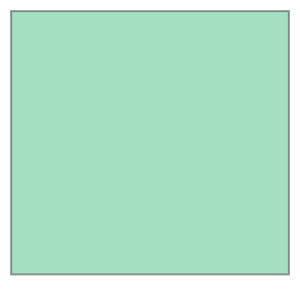

In [138]:
xmin,ymin,xmax,ymax = fin.total_bounds
extent = box(xmin,ymin,xmax,ymax)
extent

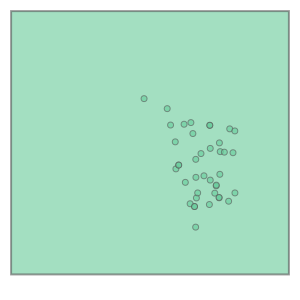

In [116]:
a = GeometryCollection([extent, mp])
a

In [158]:
distances_centroide_pts = [i.distance(centroid) for i in mp.geoms]
np.max(distances)

18138.168869693163

In [174]:
distances_pts_extent = [centroid.distance(Point(i)) for i in extent.exterior.coords]
np.max(distances_pts_extent)

50387.50912376487

In [ ]:
import random

def move_points_in_polygon():
    
    # Leer los shapes
    # Quedarnos con un multipoint y un extent
    # Calcular la distancia del centroide con los vertices del extent
    # Moverlo aleatoriamente hacia un cuadrante y en funcion de el calcular xoff, yoff
    # Comprobar si el centroide está dentro del extent
    # Si no está dentro volver a ejecutarlo
    
    rotation = random.randint(0,360)
    xoff = None
    yoff = None